Model KNN untuk Clasification


Upload Datasets


In [16]:
import pandas as pd

df = pd.read_csv(r'C:\Users\ukasy\project ML\Study Group\Kaggle Competition\Datasets\train.csv')
print(df.info())
df.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8030 entries, 0 to 8029
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  8030 non-null   int64  
 1   Surname             8030 non-null   object 
 2   CreditScore         7603 non-null   float64
 3   Geography           8030 non-null   object 
 4   Gender              7607 non-null   object 
 5   Age                 7588 non-null   float64
 6   Tenure              8030 non-null   int64  
 7   Balance             8030 non-null   float64
 8   NumOfProducts       8030 non-null   int64  
 9   HasCrCard           8030 non-null   object 
 10  IsActiveMember      7628 non-null   object 
 11  EstimatedSalary     7664 non-null   float64
 12  Complain            8030 non-null   object 
 13  Satisfaction Score  8030 non-null   int64  
 14  Card Type           8030 non-null   object 
 15  Point Earned        8030 non-null   int64  
 16  Exited

,ID,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Complain,Satisfaction Score,Card Type,Point Earned,Exited
0,1,Martin,727.0,Spain,Male,38.0,2,62276.99,1,Yes,Yes,59280.79,No,4,DIAMOND,757,0
1,2,Chinweuba,529.0,France,Female,29.0,8,0.00,2,Yes,NaN,19842.11,No,3,SILVER,476,0
2,3,Clapp,589.0,France,Female,50.0,4,0.00,2,No,Yes,182076.97,No,4,PLATINUM,441,0
3,4,Boni,515.0,France,Male,40.0,0,109542.29,1,Yes,Yes,166370.81,No,5,GOLD,312,0
4,5,Jamieson,528.0,Spain,Male,43.0,7,97473.87,2,Yes,Yes,159823.16,No,3,PLATINUM,654,0


hapus kolom yang tidak relevan
1. Surname
2. ID

In [17]:
cols_del = ['Surname', 'ID']
df = df.drop(cols_del, axis=1)

df.head(5)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Complain,Satisfaction Score,Card Type,Point Earned,Exited
0,727.0,Spain,Male,38.0,2,62276.99,1,Yes,Yes,59280.79,No,4,DIAMOND,757,0
1,529.0,France,Female,29.0,8,0.00,2,Yes,NaN,19842.11,No,3,SILVER,476,0
2,589.0,France,Female,50.0,4,0.00,2,No,Yes,182076.97,No,4,PLATINUM,441,0
3,515.0,France,Male,40.0,0,109542.29,1,Yes,Yes,166370.81,No,5,GOLD,312,0
4,528.0,Spain,Male,43.0,7,97473.87,2,Yes,Yes,159823.16,No,3,PLATINUM,654,0


Hapus duplicate cell

In [18]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

np.int64(0)

Liat isi Datsets

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8000 entries, 0 to 7999
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CreditScore         7575 non-null   float64
 1   Geography           8000 non-null   object 
 2   Gender              7579 non-null   object 
 3   Age                 7563 non-null   float64
 4   Tenure              8000 non-null   int64  
 5   Balance             8000 non-null   float64
 6   NumOfProducts       8000 non-null   int64  
 7   HasCrCard           8000 non-null   object 
 8   IsActiveMember      7600 non-null   object 
 9   EstimatedSalary     7635 non-null   float64
 10  Complain            8000 non-null   object 
 11  Satisfaction Score  8000 non-null   int64  
 12  Card Type           8000 non-null   object 
 13  Point Earned        8000 non-null   int64  
 14  Exited              8000 non-null   int64  
dtypes: float64(4), int64(5), object(6)
memory usage: 1000.0+ KB


mengisi kolom age

skew CreditScore: nan


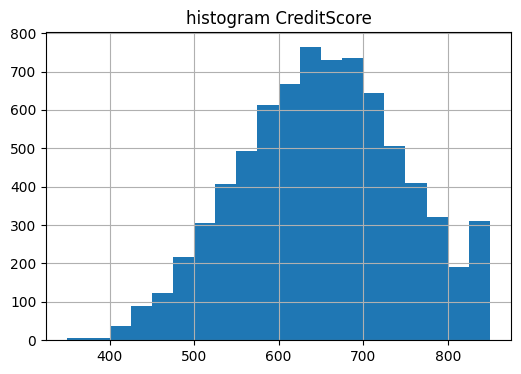

skew Age: nan


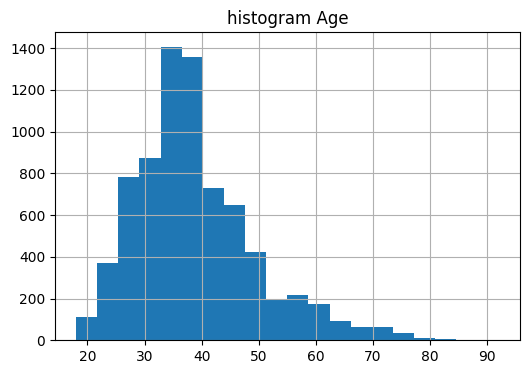

skew Tenure: 0.013033912933202397


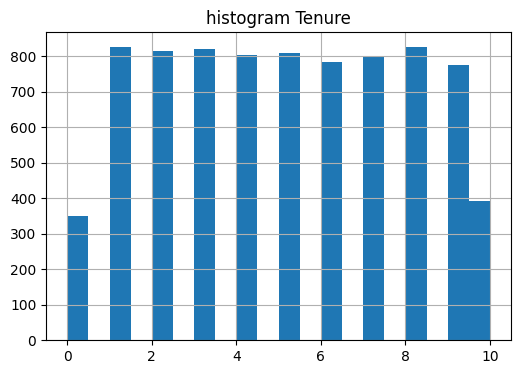

skew Balance: -0.14827569011745123


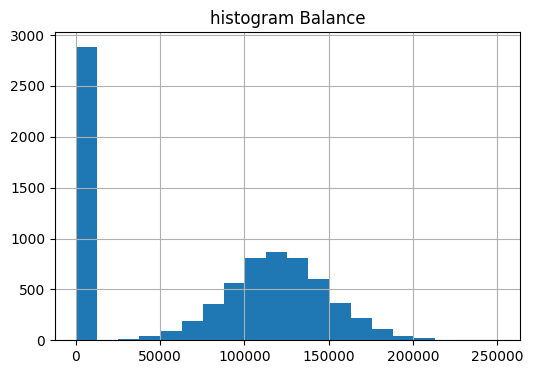

skew NumOfProducts: 0.7474096276548333


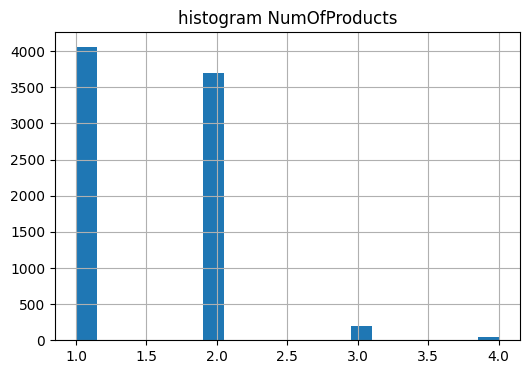

skew EstimatedSalary: nan


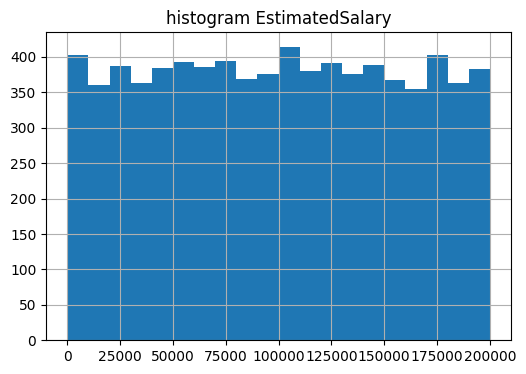

skew Satisfaction Score: -0.01239359033802047


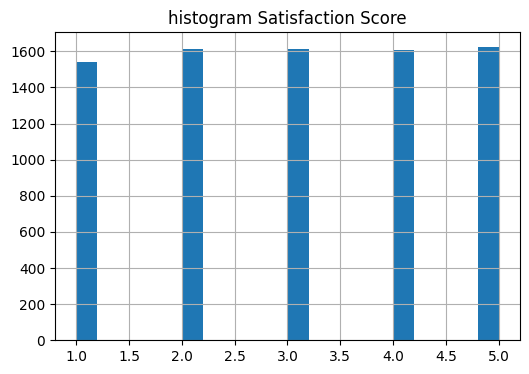

skew Point Earned: 0.02165707690074327


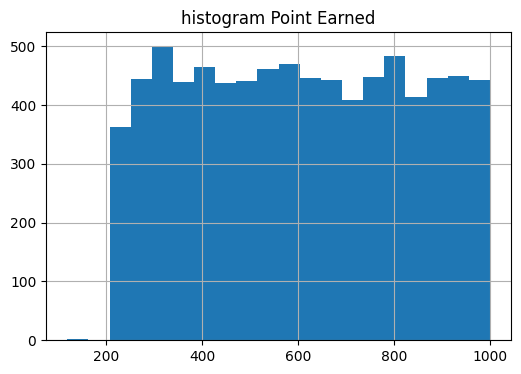

skew Exited: 1.5058717740127057


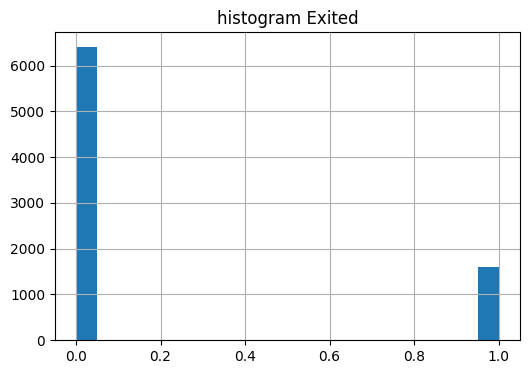

<class 'pandas.core.frame.DataFrame'>
Index: 8000 entries, 0 to 7999
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CreditScore         8000 non-null   float64
 1   Geography           8000 non-null   object 
 2   Gender              7579 non-null   object 
 3   Age                 8000 non-null   float64
 4   Tenure              8000 non-null   int64  
 5   Balance             8000 non-null   float64
 6   NumOfProducts       8000 non-null   int64  
 7   HasCrCard           8000 non-null   object 
 8   IsActiveMember      7600 non-null   object 
 9   EstimatedSalary     8000 non-null   float64
 10  Complain            8000 non-null   object 
 11  Satisfaction Score  8000 non-null   int64  
 12  Card Type           8000 non-null   object 
 13  Point Earned        8000 non-null   int64  
 14  Exited              8000 non-null   int64  
dtypes: float64(4), int64(5), object(6)
memory usage: 1000.0+ KB


In [20]:
import matplotlib.pyplot as plt
from scipy.stats import skew

df_num = df.select_dtypes(include='number')

for cols in df_num.columns:
    df[cols].hist(bins=20, figsize=(6,4))
    skew_cols = skew(df[cols])
    print(f"skew {cols}: {skew_cols}")
    plt.title(f"histogram {cols}")
    plt.show()
# berarti pakai median untuk isi kolom Age dan (karena miring)
# dan pakai mean untuk isi CreditScore dan EstimatedSalary krna tidak miring
df.fillna({'Age': df['Age'].median()}, inplace=True)
df.fillna({'CreditScore': df['CreditScore'].mean()}, inplace=True)
df.fillna({'EstimatedSalary': df['EstimatedSalary'].mean()}, inplace=True)

df.info()

Missing Values pada data kategorikal
1. Gender
2. IsActiveMember

In [21]:
df[['Gender', 'IsActiveMember']].isnull().sum()
df.fillna({'Gender' : df['Gender'].mode()[0]}, inplace=True)
df.fillna({'IsActiveMember' : df['IsActiveMember'].mode()[0]}, inplace=True)

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8000 entries, 0 to 7999
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CreditScore         8000 non-null   float64
 1   Geography           8000 non-null   object 
 2   Gender              8000 non-null   object 
 3   Age                 8000 non-null   float64
 4   Tenure              8000 non-null   int64  
 5   Balance             8000 non-null   float64
 6   NumOfProducts       8000 non-null   int64  
 7   HasCrCard           8000 non-null   object 
 8   IsActiveMember      8000 non-null   object 
 9   EstimatedSalary     8000 non-null   float64
 10  Complain            8000 non-null   object 
 11  Satisfaction Score  8000 non-null   int64  
 12  Card Type           8000 non-null   object 
 13  Point Earned        8000 non-null   int64  
 14  Exited              8000 non-null   int64  
dtypes: float64(4), int64(5), object(6)
memory usage: 1000.0+ KB


In [22]:
df.sample(10)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Complain,Satisfaction Score,Card Type,Point Earned,Exited
4152,615.000000,Spain,Male,41.0,4,0.00,1,No,Yes,149278.960000,No,2,PLATINUM,404,0
7435,650.627987,France,Male,31.0,6,0.00,2,Yes,No,26149.250000,No,4,PLATINUM,604,0
7393,496.000000,Spain,Female,44.0,0,179356.28,2,Yes,No,99788.238614,Yes,1,PLATINUM,326,1
6457,671.000000,Germany,Male,51.0,3,96891.46,1,Yes,No,176403.330000,Yes,3,PLATINUM,654,1
6627,750.000000,Spain,Female,36.0,6,0.00,2,Yes,Yes,59816.410000,No,3,PLATINUM,371,0
7584,670.000000,France,Male,38.0,7,0.00,2,Yes,Yes,77864.410000,No,1,GOLD,794,0
6130,758.000000,Spain,Female,40.0,5,93499.82,2,No,No,123218.810000,No,1,DIAMOND,793,0
6867,759.000000,France,Male,26.0,4,0.00,2,Yes,No,135394.620000,No,3,DIAMOND,275,0
7197,616.000000,Germany,Female,45.0,4,122793.96,1,Yes,Yes,62002.040000,No,5,SILVER,224,0
5344,707.000000,France,Male,58.0,6,89685.92,1,No,Yes,99788.238614,No,2,GOLD,230,0


Feature Enginnering
1. Card Type (kita akan mengubahnya menggunakan one hot encoding)

In [23]:


df = pd.get_dummies(df, columns=['Card Type'], drop_first=True)

df.sample(5)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Complain,Satisfaction Score,Point Earned,Exited,Card Type_GOLD,Card Type_PLATINUM,Card Type_SILVER
4572,778.0,Germany,Female,35.0,1,151958.19,3,Yes,Yes,131238.37,Yes,4,420,1,True,False,False
5007,542.0,Germany,Male,25.0,8,139330.10,1,No,No,54372.37,No,4,629,0,False,False,False
4871,630.0,Spain,Male,30.0,3,0.00,2,No,Yes,10486.69,No,5,274,0,False,True,False
4490,625.0,Spain,Male,57.0,7,0.00,1,No,No,84106.17,Yes,1,674,1,False,False,True
7046,603.0,France,Male,43.0,5,127823.93,1,Yes,Yes,19483.35,No,1,711,0,False,False,True


2. data dengan yes dan no(HasCrCard, IsActiveMember, Complain) akan diubah menggunkan binary encoding

In [24]:
Data_yes_no = ['HasCrCard', 'IsActiveMember', 'Complain']

df[Data_yes_no]= df[Data_yes_no].applymap(lambda x :1 if x == 'Yes' else 0 )

df.sample(5)

C:\Users\ukasy\AppData\Local\Temp\ipykernel_11212\2790484282.py:3: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df[Data_yes_no]= df[Data_yes_no].applymap(lambda x :1 if x == 'Yes' else 0 )


,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Complain,Satisfaction Score,Point Earned,Exited,Card Type_GOLD,Card Type_PLATINUM,Card Type_SILVER
2613,693.000000,France,Male,40.0,4,130661.96,1,1,1,101918.96,0,3,910,0,False,False,True
5274,569.000000,Germany,Female,37.0,8,145330.43,1,1,1,132038.65,0,2,379,0,False,True,False
194,624.000000,France,Male,37.0,6,0.00,2,0,0,84635.64,0,5,813,0,False,False,False
6838,533.000000,France,Female,37.0,2,0.00,1,0,1,73669.94,1,2,285,1,True,False,False
179,650.627987,Spain,Male,45.0,4,0.00,2,0,0,36697.48,1,1,796,1,False,False,False


3. Standarisasi & normalisasi pada data numeric


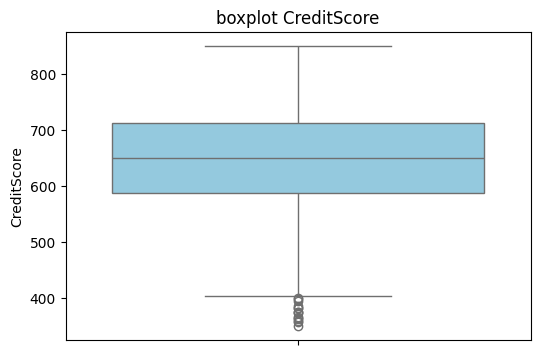

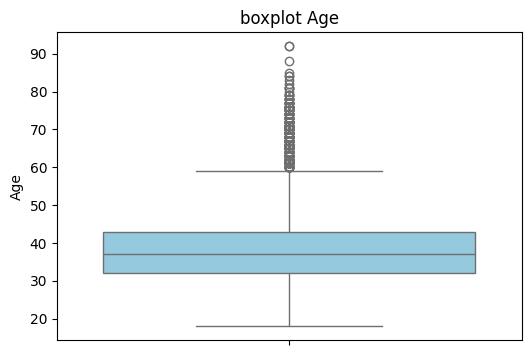

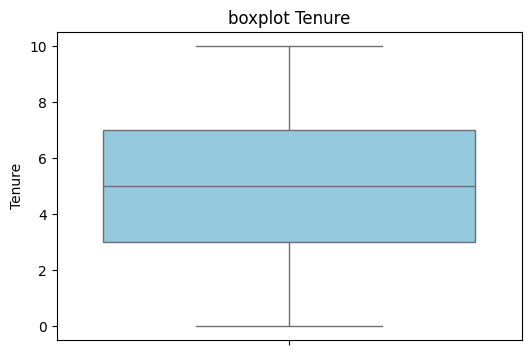

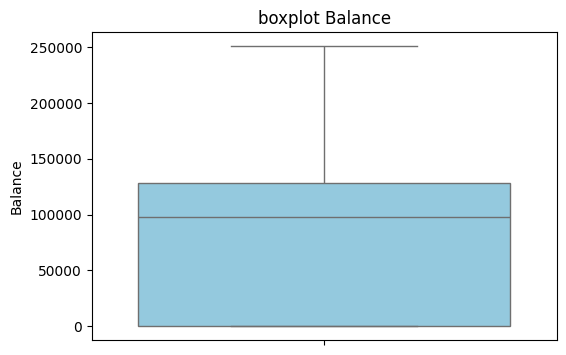

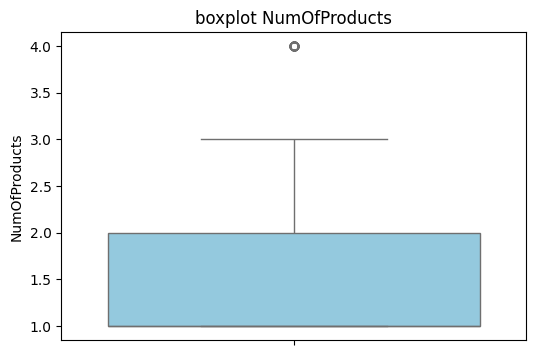

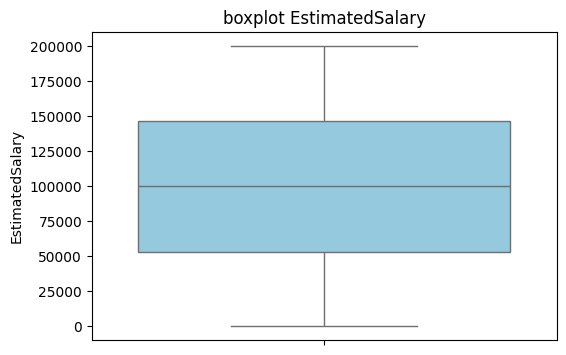

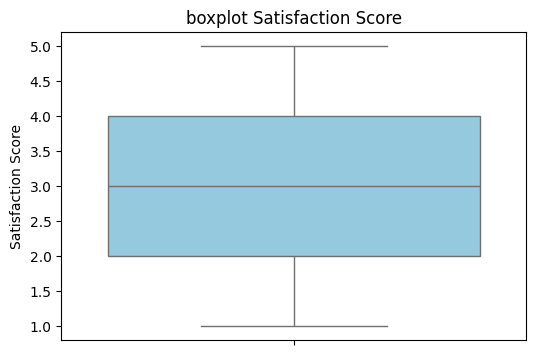

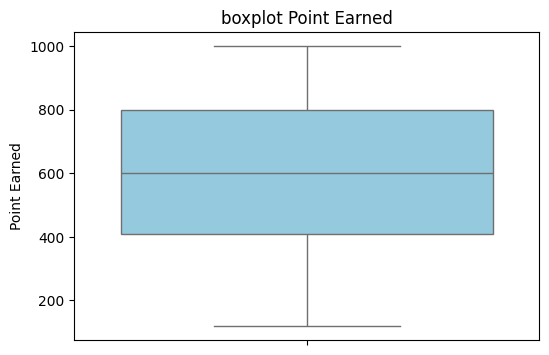

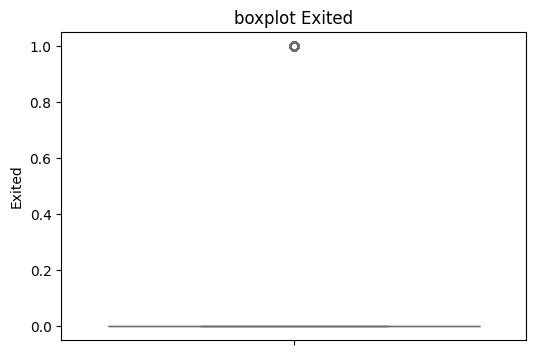

In [25]:
import seaborn as sns
for cols in df_num.columns:
    plt.figure(figsize=(6,4))
    sns.boxplot(df[cols], color='skyblue')
    plt.title(f"boxplot {cols}")
    plt.show()

3.1 data dengan outlier (log transforming) -> CreditScore, Age, NumOfProducts 

In [26]:
import numpy as np
data_log_ts = ['CreditScore', 'Age', 'NumOfProducts']

df[data_log_ts] = np.log(df[data_log_ts])

Test sesudah stndarisasi

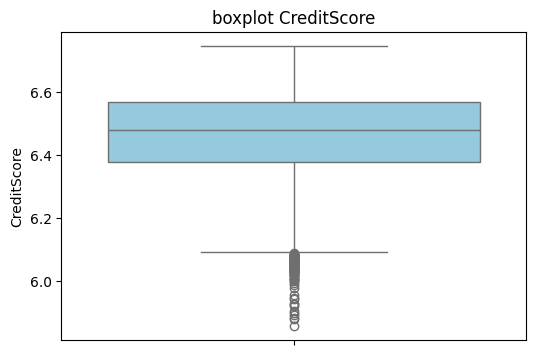

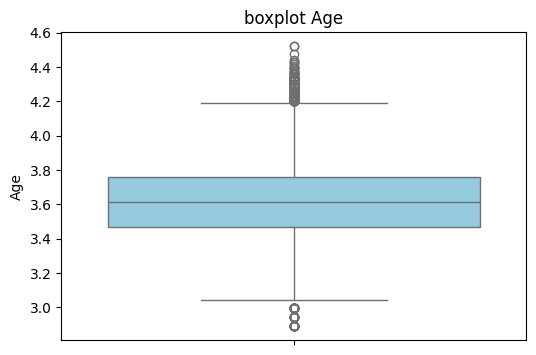

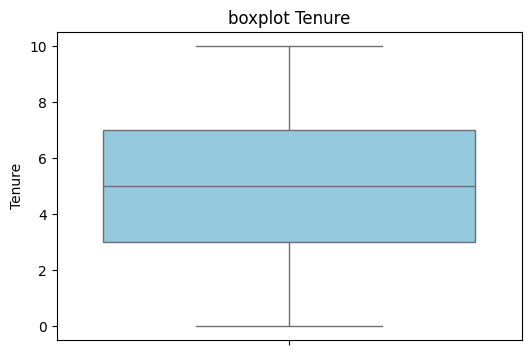

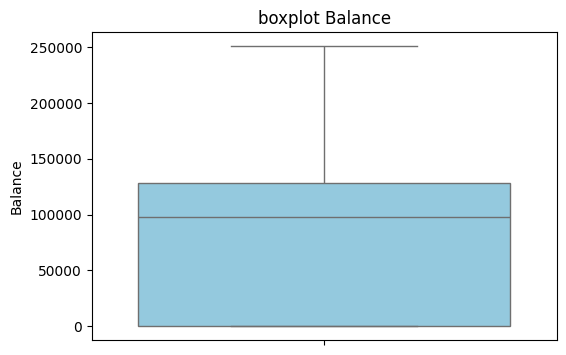

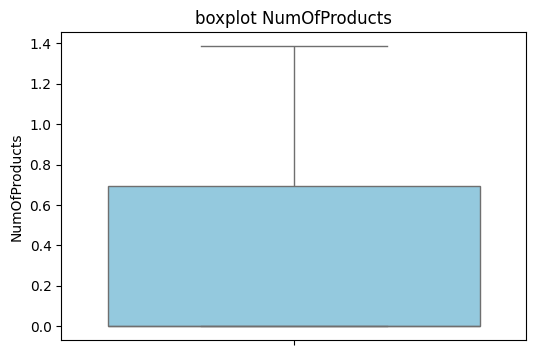

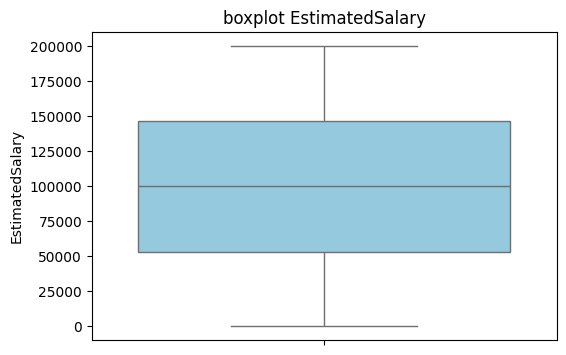

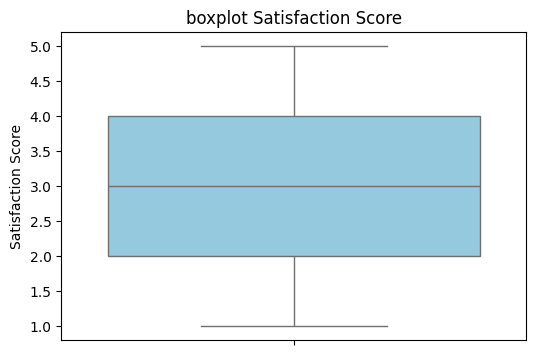

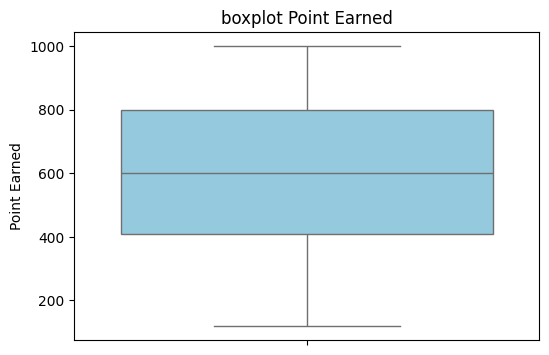

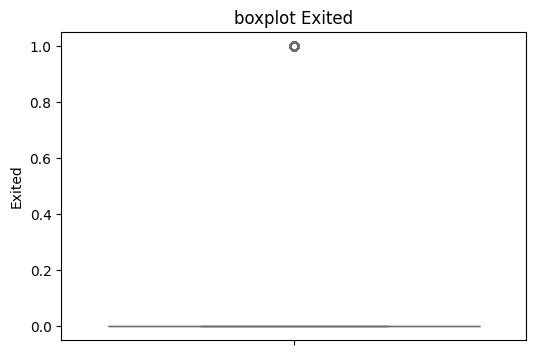

In [27]:
for cols in df_num.columns:
    plt.figure(figsize=(6,4))
    sns.boxplot(df[cols], color='skyblue')
    plt.title(f"boxplot {cols}")
    plt.show()

In [28]:
df.info()

df.sample(5)

<class 'pandas.core.frame.DataFrame'>
Index: 8000 entries, 0 to 7999
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CreditScore         8000 non-null   float64
 1   Geography           8000 non-null   object 
 2   Gender              8000 non-null   object 
 3   Age                 8000 non-null   float64
 4   Tenure              8000 non-null   int64  
 5   Balance             8000 non-null   float64
 6   NumOfProducts       8000 non-null   float64
 7   HasCrCard           8000 non-null   int64  
 8   IsActiveMember      8000 non-null   int64  
 9   EstimatedSalary     8000 non-null   float64
 10  Complain            8000 non-null   int64  
 11  Satisfaction Score  8000 non-null   int64  
 12  Point Earned        8000 non-null   int64  
 13  Exited              8000 non-null   int64  
 14  Card Type_GOLD      8000 non-null   bool   
 15  Card Type_PLATINUM  8000 non-null   bool   
 16  Card Type_S

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Complain,Satisfaction Score,Point Earned,Exited,Card Type_GOLD,Card Type_PLATINUM,Card Type_SILVER
4370,6.675823,France,Male,3.465736,2,0.00,0.693147,1,0,193817.63,1,2,442,1,False,False,False
1033,6.745236,France,Male,3.465736,4,156001.68,0.693147,1,1,151677.31,0,1,882,0,True,False,False
1476,6.186209,Spain,Male,3.295837,7,0.00,0.693147,1,0,28823.04,0,4,766,0,False,False,True
2684,6.202536,France,Female,3.555348,9,112727.06,0.693147,1,0,183752.91,0,2,697,0,False,False,False
2122,6.477938,Germany,Female,3.218876,7,144351.86,0.000000,1,0,116613.26,0,1,603,0,False,True,False


Normalisasi [ke minmax scaler]

In [32]:
df_standarisasi = df_num.columns.to_list()
indeks_to_remove = [0,1,4,8]
indeks_to_remove.sort(reverse=True)

for i in indeks_to_remove:
    df_standarisasi.pop(i) 

print(df_standarisasi)

from sklearn.preprocessing import MinMaxScaler

sc = MinMaxScaler()

df[df_standarisasi] = sc.fit_transform(df[df_standarisasi])

df.sample(5)

['Tenure', 'Balance', 'EstimatedSalary', 'Satisfaction Score', 'Point Earned']


,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Complain,Satisfaction Score,Point Earned,Exited,Card Type_GOLD,Card Type_PLATINUM,Card Type_SILVER
99,6.477938,Spain,Male,3.218876,0.7,0.000000,0.693147,1,0,0.091896,0,0.75,0.735528,0,False,True,False
5409,6.477938,France,Female,3.761200,0.5,0.000000,0.000000,1,1,0.237551,0,0.00,0.746879,0,False,False,True
5487,6.327937,Spain,Female,3.761200,0.4,0.379200,0.693147,1,0,0.615754,1,1.00,0.562997,1,False,False,False
4410,6.684612,France,Male,4.094345,0.6,0.352899,0.693147,1,1,0.658459,0,0.00,0.519864,0,False,False,True
5798,6.672033,Germany,Male,3.178054,0.7,0.428135,0.000000,0,1,0.802190,0,0.00,0.688990,0,False,True,False


sekarang kita lakukan FE pada country dan gender

In [39]:
# Gender
df['Gender']= df['Gender'].apply(lambda x :1 if x == 'Male' else 0 )

# Country




df = pd.get_dummies(df, columns=['Geography'], drop_first=True)

df.sample(5)

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Complain,Satisfaction Score,Point Earned,Exited,Card Type_GOLD,Card Type_PLATINUM,Card Type_SILVER,Geography_Germany,Geography_Spain
5523,6.308098,0,3.218876,0.5,0.000000,0.693147,0,0,0.954304,0,0.50,0.488082,0,False,True,False,False,False
7588,6.477938,0,3.912023,0.5,0.520349,1.098612,1,0,0.923791,1,0.25,0.796822,1,False,False,True,False,True
7522,6.192362,0,3.951244,0.1,0.523884,0.000000,1,0,0.185834,1,0.75,0.977299,1,True,False,False,True,False
5620,6.452049,0,3.828641,0.5,0.492799,0.000000,1,1,0.248290,1,0.00,0.717367,1,False,True,False,True,False
7910,6.475433,0,3.951244,0.8,0.195752,0.000000,1,0,0.208937,0,0.00,0.628831,0,False,False,True,False,False


Tgal masukin model

In [ ]:
# KNN Neighbors

from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=5)

x_train = df.drop(columns = ['Exited'], axis = 1)
y_train = df['Exited']

model.fit(x_train,y_train)

df_test = pd.read_csv(r'C:\Users\ukasy\project ML\Study Group\Kaggle Competition\Datasets\test.csv')
sample_sub =pd.read_csv(r"C:\Users\ukasy\project ML\Study Group\Kaggle Competition\Datasets\sample_submission.csv") 

# menyesuaikan data_test
df_test = pd.get_dummies(df_test, columns=['Card Type', 'Geography'], drop_first=True)
df_test['Gender']= df_test['Gender'].apply(lambda x :1 if x == 'Male' else 0 )
df_test[Data_yes_no]= df_test[Data_yes_no].applymap(lambda x :1 if x == 'Yes' else 0 )
df_test.drop(columns= ['ID', 'Surname'], axis=1, inplace=True)


sample_sub['Exited'] = model.predict(df_test)

sample_sub['Exited'].value_counts()

sample_sub.to_csv('MyFirstSUB_KNN.csv', index=False)







C:\Users\ukasy\AppData\Local\Temp\ipykernel_11212\858796564.py:18: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_test[Data_yes_no]= df_test[Data_yes_no].applymap(lambda x :1 if x == 'Yes' else 0 )


2. Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, random_state=42)

x_train = df.drop(columns = ['Exited'], axis = 1)
y_train = df['Exited']

model.fit(x_train,y_train)

df_test = pd.read_csv(r'C:\Users\ukasy\project ML\Study Group\Kaggle Competition\Datasets\test.csv')
sample_sub =pd.read_csv(r"C:\Users\ukasy\project ML\Study Group\Kaggle Competition\Datasets\sample_submission.csv") 

# menyesuaikan data_test
df_test = pd.get_dummies(df_test, columns=['Card Type', 'Geography'], drop_first=True)
df_test['Gender']= df_test['Gender'].apply(lambda x :1 if x == 'Male' else 0 )
df_test[Data_yes_no]= df_test[Data_yes_no].applymap(lambda x :1 if x == 'Yes' else 0 )
df_test.drop(columns= ['ID', 'Surname'], axis=1, inplace=True)


sample_sub['Exited'] = model.predict(df_test)

sample_sub['Exited'].value_counts()

sample_sub.to_csv('MySecondSUB_RandomForest.csv', index=False)





C:\Users\ukasy\AppData\Local\Temp\ipykernel_11212\714617772.py:16: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_test[Data_yes_no]= df_test[Data_yes_no].applymap(lambda x :1 if x == 'Yes' else 0 )
